In [1]:
import pandas as pd
import plotly.graph_objects as go

In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kaveh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kaveh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kaveh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer

In [4]:
# Imports the Counter class from the collections module in Python.
# A Counter is a dictionary-like data structure specifically designed to count occurrences of elements.
# We'll use it to count the frequency of bigram (two-word) combinations within each sentence.
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [5]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

# https://github.com/NeelShah18/emot/blob/master/emot/emo_unicode.py  emoticons list
# https://github.com/rishabhverma17/sms_slang_translator/blob/master/slang.txt Chat shortcuts

def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r' ', text)

def remove_punctuations(text):
    punctuations = re.compile(r'[~`!@#$%^&*(,<،>){}\\/|\'"?؟_+-=~\[\]]')
    return punctuations.sub(r' ', text)

def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r' ', text)

def remove_weird_chars(text):
    weridPatterns = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u'\U00010000-\U0010ffff'
                               u"\u200d"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\u3030"
                               u"\ufe0f"
                               u"\u2069"
                               u"\u2066"
                               u"\u200c"
                               u"\u2068"
                               u"\u2067"
                               "]+", flags=re.UNICODE)
    patterns = [re.compile('\r'), re.compile('\n'), re.compile('&amp;')]
    text = weridPatterns.sub(r'', text)
    for p in patterns:
        text = p.sub(r' ', text)
    return text

def remove_extra_repeated_alpha(text):
    """
    Remove extra repeated alphabets in a word
    check these links:
    demo : https://regex101.com/r/ALxocA/1
    Question: https://bit.ly/2DoiPqS
    """
    return re.sub(r'([^\W\d_])\1{2,}', r'\1', text)

In [6]:
def first_step_cleaning(text):
    # text = text.encode('utf-8')
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', str(text)).strip()
    # text = text.replace('-',' ')
    # Remove numbers
    # text = re.sub('\d+', '', text)
    # Case normalization
    text = text.lower()
    # text = p.clean(text).replace("Image","").replace("profile picture","").replace("  ","")
    # Remove URLs, HTML tags, and non-alphanumeric characters
    text = text.replace("\\xc2\\xa9","")
    text = text.replace("\n","")
    text = text.replace("..","")
    text = text.replace("  ","")
    text = text.replace("\x0c","")
    text = text.replace(r"\u0107","")
    for i in range(50):
        text = text.replace("\n{}".format(i),"")
    for i in range(500):
        text = text.replace(r"\u0{}".format(i),"")
    # text = re.sub(r'http\S+', '', single_string)
    # text = re.sub('<[^>]*>', '', text)
    # text = re.sub('[^a-zA-Z0-9]', ' ', text)
    text = remove_urls(text)
    text = remove_html(text)
    text = remove_weird_chars(text)
    text = remove_extra_repeated_alpha(text)
    # Remove punctuations
    # text = "".join([char for char in text if char not in string.punctuation])
    return text

In [7]:
def second_step_cleaning_tokenizing(text):
    # Remove all punctuation except the ones to keep
    # ‘ 
    # ’
    translator = str.maketrans('', '', string.punctuation)
    text = str(text).translate(translator).replace("•"," ").replace("’","").replace("‘","").replace("  ","")
    # Tokenization
    tokens = word_tokenize(text)

    # Stopword removal
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Stemming
    stemmer = SnowballStemmer("english")
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]

    # Lemmatization
    wnl = WordNetLemmatizer()
    lemmatized_tokens = [wnl.lemmatize(word) for word in stemmed_tokens]

    return lemmatized_tokens

In [176]:
raw_df = pd.read_csv("CheckPoint_phase_2_W2V_01.csv")
filt = raw_df.iloc[:,:-6]

In [177]:
second_step_C = filt.copy()

In [178]:
second_step_C = second_step_C.map(second_step_cleaning_tokenizing)

In [179]:
def replace_null(elem):
    # print(elem)
    try:
        if elem[0] == "nan":
            return pd.NaT
        else:
            return elem
    except:
        return pd.NaT

In [180]:
second_step_C_null_r = second_step_C.copy()

In [181]:
second_step_C_null_r = second_step_C_null_r.map(replace_null)

In [182]:
type(second_step_C_null_r.iloc[1,0])

pandas._libs.tslibs.nattype.NaTType

In [183]:
second_step_C_null_r.to_csv("CheckPoint_phase_3_step_2_C_tokenized.csv",index=False)

# CheckPoint_phase_3_step_2_C_tokenized
## phrasing Step

In [8]:
check_tokenized_01 = pd.read_csv("CheckPoint_phase_3_step_2_C_tokenized.csv")
check_tokenized_01

,"12. Do we need different measures to ensure all segments of the road transport sector are able to reduce emissions, and if so what government and industry measures might well support the uptake of electric bikes, micro-mobility and motorbikes?",8. Would vehicle fuel efficiency standards incentivise global manufacturers to send EVs and lower emission vehicles to Australia?,3. What are suitable indicators to measure if we are on track to achieve our goals and objectives?,15. What actions can governments and industry take to strengthen our competitiveness and innovate across the full lifecycle of the EV value chain?,16. How can we expand our existing domestic heavy vehicle manufacturing and assembly capability?,1. Do you agree with the objectives and do you think they will achieve our proposed goals? Are there other objectives we should consider?,6. What information could help increase demand and is Government or industry best placed to inform Australians about EVs?,7. Are vehicle fuel efficiency standards an effective mechanism to reduce passenger and light commercial fleet emissions?,What area best describes where you live?,18. Are there other proposals that could help drive demand for EVs and provide a revenue source to help fund road infrastructure?,...,13. How could we best increase the number of affordable second hand EVs?,4. Are there other measures by governments and industry that could increase affordability and accessibility of EVs to help drive demand?,19. What more needs to be done nationally to ensure we deliver a nationally comprehensive framework for EVs?,What state or territory do you live in?,5. Over what timeframe should we be incentivising low emission vehicles as we transition to zero emission vehicles?,17. Is it viable to extend Australian domestic manufacturing and assembly capability to other vehicle classes?,"10. What design features should the Government consider in more detail for vehicle fuel efficiency standards, including level of ambition, who they should apply to, commencement date, penalties and enforcement?",20. How can we best make sure all Australians get access to the opportunities and benefits from the transition?,Make a general comment,"9. In addition to vehicle fuel efficiency standards for passenger and light commercial vehicles, would vehicle fuel efficiency standards be an appropriate mechanism to increase the supply of heavy vehicle classes to Australia?"
0,"['yes', 'plea', 'plea', 'follow', 'climat', 'c...",NaN,"['rapid', 'reduc', 'sale', 'ice', 'vehicl', 'r...",NaN,NaN,"['agre', 'current', 'object', 'howev', 'addit'...","['govern', 'inform', 'australian', 'benefit', ...","['yes', 'shown', 'eu', 'etc', 'plea', 'introdu...",['citi'],NaN,...,NaN,"['govern', 'tri', 'sell', 'public', 'car', 'tr...","['creat', 'nation', 'strategi', 'near', 'zero'...","['new', 'south', 'wale']","['plea', 'incentivis', 'hybrid', 'plugin', 'hy...",NaN,"['worldbest', 'ambit', 'soon', 'possibl']","['make', 'ride', 'bike', 'safe', 'access', 'dr...","['took', 'two', 'kid', 'pram', 'bus', 'street'...",NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,"['govern', 'industri', 'local', 'distributor',...",NaN,['citi'],NaN,...,"['allow', 'peopl', 'freeli', 'import', 'instea...","['yes', 'one', 'greatest', 'obstacl', 'afford'...",NaN,"['new', 'south', 'wale']",NaN,NaN,NaN,NaN,"['want', 'ev', 'australia', 'allow', 'free', '...",NaN
2,"['differ', 'measur', 'doubt', 'need', 'support...","['evid', 'sugget', 'encourag']","['set', 'target', 'year', 'ban', 'ice', 'vehic...","['support', 'full', 'lifecyl', 'batteri', 'man...","['priotis', 'local', 'made', 'heavi', 'vehicl'...","['unclear', 'whether', 'establish', 'system', ...","['govern', 'industri', 'role', 'play', 'inform...","['indic', 'fuel', 'effici', 'standard', 'criti...",['citi'],"['fuel', 'excis', 'current', 'utilis', 'road',...",...,"['mandat', 'purchas', 'ev', 'govern', 'fleet',...","['per', 'intern', 'jurisdict', 'norway', 'phas...","['absolut', 'new', 'build', 'requir', 'includ'...",

In [9]:
Q_01 = check_tokenized_01.iloc[:,0].dropna().apply(eval).tolist()

In [186]:
len(Q_01)

165

In [12]:
# Function to generate bigrams for a document
def get_bigrams(sentences):
  bigrams = []
  for sentence in sentences:
    for i in range(len(sentence) - 1):
      bigram = (sentence[i], sentence[i+1])  # Create bigram tuple
      bigrams.append(bigram)
  return Counter(bigrams)

In [188]:
# Generate bigram counts
bigram_counts = get_bigrams(Q_01)

In [189]:
bigram_counts

Counter({('electr', 'bike'): 26,
         ('public', 'transport'): 16,
         ('bike', 'lane'): 11,
         ('reduc', 'emiss'): 10,
         ('bike', 'micromobl'): 9,
         ('charg', 'infrastructur'): 9,
         ('feder', 'govern'): 8,
         ('heavi', 'vehicl'): 8,
         ('electr', 'vehicl'): 8,
         ('charg', 'station'): 7,
         ('electr', 'scooter'): 6,
         ('activ', 'transport'): 6,
         ('road', 'transport'): 6,
         ('motor', 'bike'): 6,
         ('bike', 'etc'): 6,
         ('bike', 'scooter'): 5,
         ('electr', 'motorbik'): 5,
         ('micromobl', 'vehicl'): 5,
         ('road', 'user'): 5,
         ('micro', 'mobil'): 5,
         ('speed', 'limit'): 5,
         ('state', 'territori'): 4,
         ('transport', 'sector'): 4,
         ('import', 'duti'): 4,
         ('ev', 'bike'): 4,
         ('may', 'need'): 4,
         ('road', 'network'): 4,
         ('tax', 'incent'): 4,
         ('long', 'haul'): 4,
         ('emiss', 'standard'): 4,

In [13]:
def replace_bigrams_in_sentences(sentences, bigram_counts, threshold=1):
  """
  Replaces bigrams in sentences with concatenated string based on frequency.

  Args:
      sentences: List of lists, where each inner list is a tokenized sentence.
      bigram_counts: Counter object containing bigram frequencies.
      threshold: Minimum frequency for considering a bigram frequent (default=1).

  Returns:
      A new list of lists with bigrams replaced in each sentence.
  """
  updated_sentences = []
  for sentence in sentences:
    updated_sentence = []
    flag = False
    skip = 0
    for i in range(len(sentence)-1):
        if skip>0 and skip == i:
            continue
        bigram = (sentence[i], sentence[i+1])
        if bigram in bigram_counts and bigram_counts[bigram] > threshold:
            # Replace bigram with concatenated form
            concatenated_bigram = "_".join(bigram)
            updated_sentence.append(concatenated_bigram)
            if i == len(sentence)-1:
                flag = True
            skip = i+1
        else:
            # Keep individual words for infrequent bigrams
            updated_sentence.append(sentence[i])  # Add both words separately
    # Add the last word (no bigram check needed)
    if flag == False:
        updated_sentence.append(sentence[-1])
    updated_sentences.append(updated_sentence)
  return updated_sentences

In [191]:
# Replace bigrams with threshold of 1 (appearing more than once)
threshold = 2
updated_Q_01 = replace_bigrams_in_sentences(Q_01, bigram_counts, threshold)

In [192]:
updated_Q_01[0]

['yes',
 'plea',
 'plea',
 'follow',
 'climat',
 'council',
 'polici',
 'sustain',
 'transport',
 'note',
 'aim',
 'state_territori',
 'realloc',
 'fund',
 'highway',
 'motorway',
 'activ',
 'public_transport',
 'fund',
 'safe',
 'separ_bike',
 'lane',
 'network',
 'peopl',
 'electr_bike',
 'scooter',
 'danger',
 'peopl',
 'walk',
 'possibl',
 'encourag_state',
 'territori',
 'roll',
 'enforc',
 '30',
 'kmh',
 'zone',
 'around_school',
 'playground',
 'high',
 'street',
 'place',
 'peopl',
 'want',
 'walk',
 'ride',
 'bike',
 'help',
 'australian',
 'live',
 'healthier',
 'live',
 'make',
 'walk',
 'ride',
 'bike',
 'take',
 'bus',
 'train',
 'easi',
 'safe',
 'way',
 'get',
 'around']

In [193]:
# Join sentences with "." separator
joined_string_sentences = [" ".join(sentence) for sentence in updated_Q_01]

In [194]:
len(joined_string_sentences)

165

In [195]:
# Combine all strings into a single string

all_text = " ".join(joined_string_sentences)

In [196]:
all_text

'yes plea plea follow climat council polici sustain transport note aim state_territori realloc fund highway motorway activ public_transport fund safe separ_bike lane network peopl electr_bike scooter danger peopl walk possibl encourag_state territori roll enforc 30 kmh zone around_school playground high street place peopl want walk ride bike help australian live healthier live make walk ride bike take bus train easi safe way get around differ_measur doubt need_support differ transport_sector includ addit invest emerg sector consid uptak option electr_bike micromobl motorbik intern learn mistak well research micromobl noncontributor reduc_emiss larg replac walk public_transport rather form car usag electr_bike big opportun particular cargo carrier need_support addit cycleway share system utilis dock option best practic electr_motorbik scooter eg vespa type provid signific benefit support onstreet charg_infrastructur also support rollout swappabl batteri swappabl batteri class provid gri

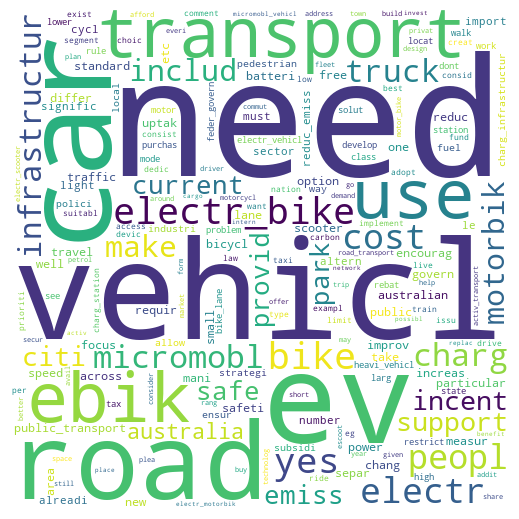

In [204]:
wordcloud = WordCloud(width = 500, height = 500,
                background_color ='white',
                min_font_size = 5).generate(all_text)
 
# plot the WordCloud image                       
plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Put all in a single function

In [14]:
def bigram_2_word_cloud(df,question):
    df_C_F = df.loc[:,question].dropna().apply(eval).tolist()
    bigram_counts = get_bigrams(df_C_F)
    # Replace bigrams with threshold of 1 (appearing more than once)
    threshold = 2
    updated_df_C_F = replace_bigrams_in_sentences(df_C_F, bigram_counts, threshold)
    # Join sentences with "." separator
    joined_string_sentences = [" ".join(sentence) for sentence in updated_df_C_F]
    # Combine all strings into a single string
    all_text = " ".join(joined_string_sentences)
    wordcloud = WordCloud(width = 500, height = 500,
                background_color ='white',
                min_font_size = 5).generate(all_text)
 
    # plot the WordCloud image                       
    plt.figure(figsize = (5, 5), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\kaveh\\AppData\\Local\\anaconda3\\envs\\GPU_Kaveh\\Lib\\site-packages\\matplotlib\\pyplot.py'>

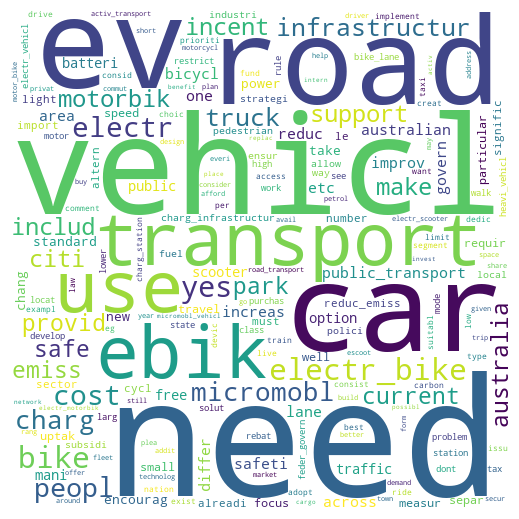

In [15]:
bigram_2_word_cloud(check_tokenized_01,check_tokenized_01.columns[0])

# END of word cloud n-gram project 01 mohammad karimadini